In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
 Data ,Y = make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1 ,random_state=4)
#using sklearn for an example dataset

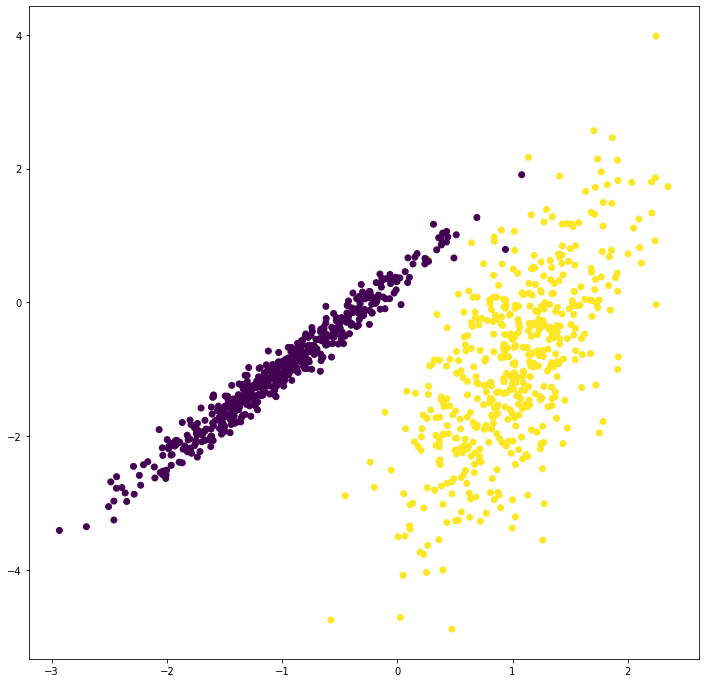

In [3]:
plt.figure(figsize = (12,12))
plt.scatter(Data[:,0],Data[:,1],c=Y) #visualizing the dataset

In [18]:
Y[Y==0] =-1 #chaning the labels to -1

In [4]:
#creating an SVM class
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C 
        self.w = 0 #weight
        self.b = 0 #bias
    
    def lossf(self,x,y,w,b):
        w1 = np.dot(w,w.T)/2
        ei = 0.0
        C =self.C
        for i in range(x.shape[0]):
            ti = y[i]*(np.dot(w,x[i])+b)
            ei += max(0,1-ti)
        loss = w1+C*ei
        return loss
    def grad(self,x,y,w,b):
        gw = 0.0
        gb = 0.0
        for i in range(x.shape[0]):
            ti = y[i]*(np.dot(w,x[i])+b)
            if ti <1:
                gw+= y[i]*x[i]
                gb+=y[i]
        return gw,gb
    def fit(self,x,y,lr = 0.00001,epochs = 500,batch_size = 100):
        m = x.shape[0]
        n = x.shape[1]
        w = np.zeros((n,))
        b = 0.0
        loss = []
        C =self.C
        for i in range(epochs):
            for batch_s in range(0,m,batch_size):
                xb = x[batch_s:batch_s+batch_size,:]
                yb = y[batch_s:batch_s+batch_size]
                l = self.lossf(xb,yb,w,b)
                loss.append(l)
                gw,gb = self.grad(xb,yb,w,b)
                w = w -lr*w + lr*C*gw
                b = b + lr*C*gb
        self.w = w
        self.b = b
        return w,b,loss

In [5]:
Y.shape

(1000,)

In [19]:
svm = SVM()

In [20]:
w,b,loss = svm.fit(Data,Y) #traing the data

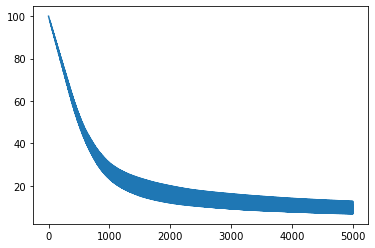

In [21]:
plt.plot(loss) #visualizing the loss


In [22]:
loss[-1]

10.953657068160151

In [23]:
loss[0]

100.0

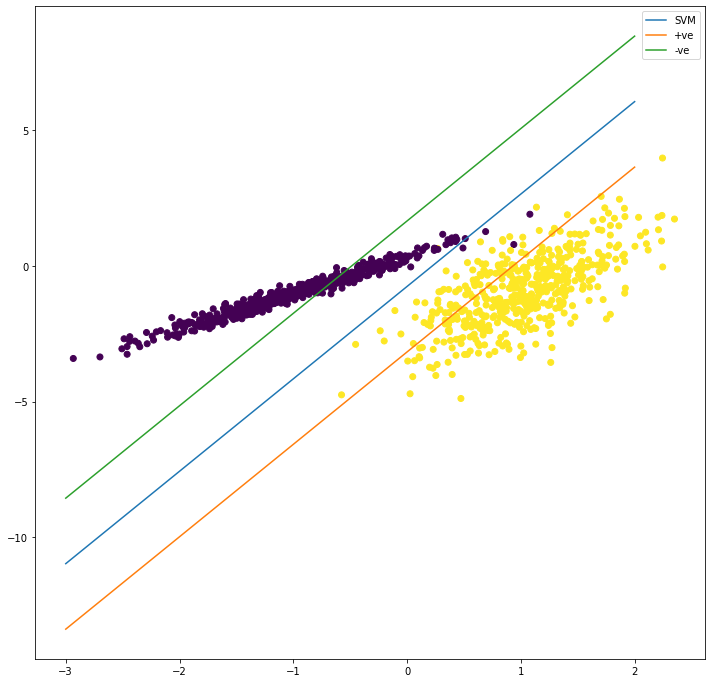

In [24]:
#plotting the svm
x1 = np.arange(-3,3)
x2 = (-w[0]*x1-b)/w[1]
xp = (-w[0]*x1-b+1)/w[1]
xn = (-w[0]*x1-b-1)/w[1]
plt.figure(figsize = (12,12))
plt.scatter(Data[:,0],Data[:,1],c=Y)
plt.plot(x1,x2,label = 'SVM')
plt.plot(x1,xp,label = '+ve')
plt.plot(x1,xn,label = '-ve')
plt.legend()
plt.show()

In [74]:
#using another example to test the SVM class

In [12]:
Data1 ,Y1 = make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1 ,random_state=3)

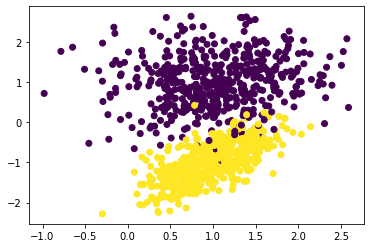

In [13]:
plt.scatter(Data1[:,0],Data1[:,1],c=Y1)

In [25]:
Y1[Y1==0]= -1

In [26]:
svm1 = SVM()

In [27]:
w1,b1,loss1 = svm1.fit(Data1,Y1)

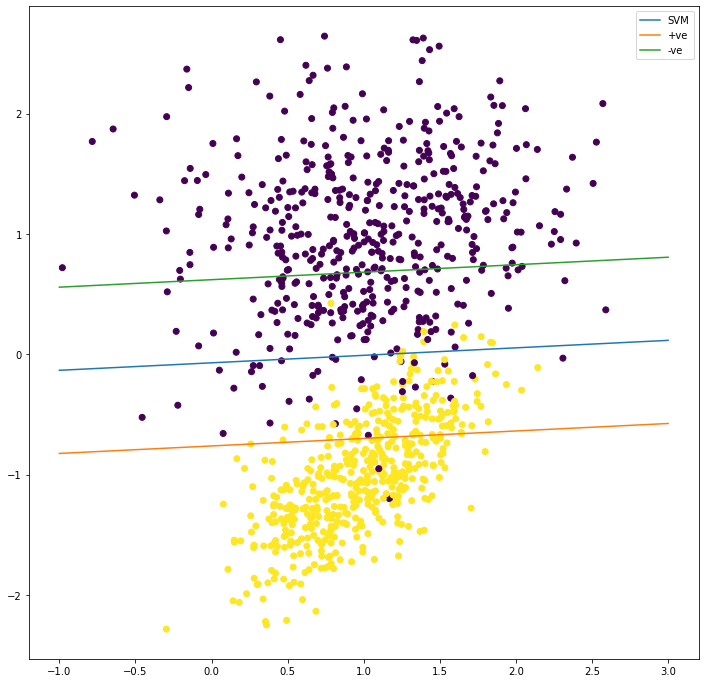

In [30]:
#visualzing the margins
x11 = np.arange(-1,4)
x22 = (-w1[0]*x11-b1)/w1[1]
xpp = (-w1[0]*x11-b1+1)/w1[1]
xnn = (-w1[0]*x11-b1-1)/w1[1]
plt.figure(figsize = (12,12))
plt.scatter(Data1[:,0],Data1[:,1],c=Y1)
plt.plot(x11,x22,label = 'SVM')
plt.plot(x11,xpp,label = '+ve')
plt.plot(x11,xnn,label = '-ve')
plt.legend()
plt.show()

In [31]:
#making a predict function
def predict(w,b,x):
    y = np.dot(x,w)+b
    for i in range(x.shape[0]):
        if y[i]>0 :
            y[i]=int(1)
        else:
            y[i]=int(-1)
    return y

In [32]:
y = predict(w1,b1,Data1)

In [33]:
#accuracy
np.sum(y==Y1)/Data.shape[0]

0.957

In [34]:
#importing packages for pokidex
from pathlib import Path
import cv2

In [35]:

p = Path("./Images/")

In [36]:
train = pd.read_csv('train.csv').values


In [37]:
dirs = p.glob("*")
dicti = {}
for i in dirs:
    imgname = str(i).split('\\')[-1]
    img = cv2.imread("./Images/"+imgname)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(100,100))
    dicti[imgname] = img

In [38]:
X = []
for i in range(train[:,0].shape[0]):
    X.append(dicti[train[i,0]])

In [39]:

Y = train[:,1]

In [40]:
X = np.array(X)

In [41]:
X.shape

(304, 100, 100, 3)

In [42]:
Y.shape

(304,)

Bulbasaur


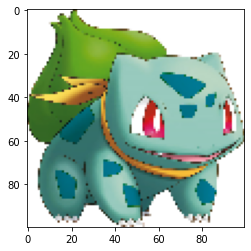

In [43]:
plt.imshow(X[115])
print(Y[115])

In [44]:
#using labelencoder to transform the data
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()

In [46]:
Y_=le.fit_transform(Y)

In [ ]:
X = X.reshape(304,-1)

In [49]:
X.shape

(304, 30000)

In [50]:
#making a label dictionary for available pokemons
labeldict = { 0 : 'Bulbasaur',1: 'Charmander' , 2: 'Pikachu'}

In [52]:
Y_ = Y_.reshape(-1,1)

In [64]:
Y_.shape

(304, 1)

In [54]:
#shuffling the data for better randomized training
np.random.shuffle(Data)

In [55]:
Data = np.column_stack((X,Y_))

In [65]:
Data.shape

(304, 30001)

In [67]:
X_ = Data[:,:-1]
Y_ = Data[:,-1]

In [68]:
X_.shape 
Y_.shape

(304,)

In [ ]:
# X_ TRAIN ,Y_ labels

In [57]:
classes = 3

In [69]:
#labeling the data
def labeldata(X,Y):
    labeldict = {}
    for i in range(classes):
        labeldict[i] = []
    for i in range(X.shape[0]):
        labeldict[Y[i]].append(X[i])
    for i in labeldict.keys():
        labeldict[i] = np.array(labeldict[i])
    return labeldict

In [70]:
datadict = labeldata(X_,Y_)

In [71]:
#creating pairs
def pairwise(d1,d2):
    s1 = d1.shape[0]
    s2 = d2.shape[0]
    
    exs = s1+s2
    features = d1.shape[1]
    
    data_p = np.zeros((exs,features))
    data_l = np.zeros((exs,))
    
    data_p[:s1,:] = d1
    data_p[s1:,:] = d2
    
    data_l[:s1] = -1
    data_l[s1:] = 1
    
    return data_p,data_l

In [72]:
def train(datadict):
    svmclass = {}
    for i in range(classes):
        svmclass[i] = {}
        for j in range(i+1,classes):
            mysvm = SVM()
            x,y = pairwise(datadict[i],datadict[j])
            w,b,loss = mysvm.fit(x,y)
            svmclass[i][j] = { 'weights' : w,'bias' :b , 'lossarr' : loss}
    return svmclass

In [73]:
svmclass = train(datadict)

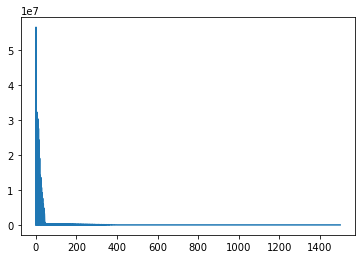

In [74]:
plt.plot(svmclass[0][1]['lossarr'])

In [75]:
svmclass[0][1]['lossarr'][0]

100.0

In [76]:
svmclass[0][1]['weights']

array([-0.07985121, -0.00109411,  0.15538898, ..., -0.13367465,
       -0.03360694,  0.18080061])

In [77]:
svmclass[0][1]['lossarr'][-1]

1460.7685448658317

In [80]:
#binary prediction function for one vs all
def binarypred(x,w,b):
    z = np.dot(x,w.T)+b
    if z>=0:
        pred =1
    else:
        pred = -1
    return pred
def predict(x,svmclass):
    count = np.zeros((classes,))
    for i in range(classes):
        for j in range(i+1,classes):
            w = svmclass[i][j]['weights']
            b = svmclass[i][j]['bias']
            z= binarypred(x,w,b)
            if z==1:
                count[j]+=1
            else:
                count[i]+=1
    pred =np.argmax(count)
  #  print(count)
    return pred

In [81]:
pred = predict(X_[244],svmclass)

In [82]:
pred #prediciton by SVM classifier

1

In [83]:
Y_[244] #expected prediction

1

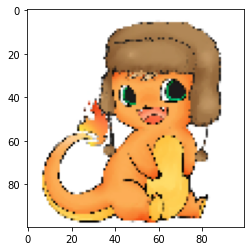

In [93]:
plt.imshow(datadict[1][100].reshape(100,100,3)) #visualizing the image

In [92]:
labeldict[1] #

'Charmander'

In [250]:
Y = []  #creating a list of predicions
for i in range(X_.shape[0]):
    pred = predict(X_[i],svmclass)
    Y.append(pred)

In [ ]:
#You can ignore the code after this as it is just testing the model on more images and 
#then creating a csv file for submission 

In [233]:
np.sum(Y==Y_)/len(Y) #as it is a small dataset hence I am getting 100% accuracy

1.0

In [190]:
Y

[1]

In [197]:
Y =np.array(Y)

In [210]:
datadict[0][1]

array([120, 196, 170, ..., 174, 207,  90])

In [237]:
test = pd.read_csv('test.csv').values

In [239]:
test.shape

(123, 1)

In [240]:
Xt = []
for i in range(test[:,0].shape[0]):
    Xt.append(dicti[test[i,0]])

In [242]:
Xt = np.array(Xt)

In [244]:
Xt = Xt.reshape(123,-1)

In [245]:
Xt.shape

(123, 30000)

In [251]:
Yt = []
for i in range(Xt.shape[0]):
    pred = predict(Xt[i],svmclass)
    Yt.append(pred)

In [253]:
Yp = []
for i in Yt:
    Yp.append(labeldict[i])

In [262]:
Yp =Yp.reshape(-1,1)

In [260]:
test.shape

(123, 1)

In [263]:
Yp.shape

(123, 1)

In [265]:
output = np.column_stack((test,Yp))

In [267]:
df = pd.DataFrame(output , columns = ['ImageId','NameOfPokemon'])